In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [2]:
import sklearn

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import imputation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  Lasso, Ridge, ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
car_sales = pd.read_csv('Car_sales.csv')

In [5]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

In [6]:
car_sales.describe()

Sales_in_thousands  four_year_resale_value  Price_in_thousands  \
count          157.000000              121.000000          155.000000   
mean            52.998076               18.072975           27.390755   
std             68.029422               11.453384           14.351653   
min              0.110000                5.160000            9.235000   
25%             14.114000               11.260000           18.017500   
50%             29.450000               14.180000           22.799000   
75%             67.956000               19.875000           31.947500   
max            540.561000               67.550000           85.500000   

       Engine_size  Horsepower   Wheelbase       Width      Length  \
count   156.000000  156.000000  156.000000  156.000000  156.000000   
mean      3.060897  185.948718  107.487179   71.150000  187.343590   
std       1.044653   56.700321    7.641303    3.451872   13.431754   
min       1.000000   55.000000   92.600000   62.600000  149.400000   
25%       2.300000  149.500000  103.000000   68.400000  177.575000   
50%       3.000000  177.500000  107.000000   70.550000  187.900000   
75%       3.575000  215.000000  112.200000   73.425000  196.125000   
max       8.000000  450.000000  138.700000   79.900000  224.500000   

       Curb_weight  Fuel_capacity  Fuel_efficiency  Power_perf_factor  
count   155.000000     156.000000       154.000000         155.000000  
mean      3.378026      17.951923        23.844156          77.043591  
std       0.630502       3.887921         4.282706          25.142664  
min       1.895000      10.300000        15.000000          23.276272  
25%       2.971000      15.800000        21.000000          60.407707  
50%       3.342000      17.200000        24.000000          72.030917  
75%       3.799500      19.575000        26.000000          89.414878  
max       5.572000      32.000000        45.000000         188.144323

In [7]:
car_sales.head()

Manufacturer    Model  Sales_in_thousands  four_year_resale_value  \
0        Acura  Integra              16.919                  16.360   
1        Acura       TL              39.384                  19.875   
2        Acura       CL              14.114                  18.225   
3        Acura       RL               8.588                  29.725   
4         Audi       A4              20.397                  22.255   

  Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  \
0    Passenger               21.50          1.8       140.0      101.2   67.3   
1    Passenger               28.40          3.2       225.0      108.1   70.3   
2    Passenger                 NaN          3.2       225.0      106.9   70.6   
3    Passenger               42.00          3.5       210.0      114.6   71.4   
4    Passenger               23.99          1.8       150.0      102.6   68.2   

   Length  Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0   172.4        2.639           13.2             28.0      2/2/2012   
1   192.9        3.517           17.2             25.0      6/3/2011   
2   192.0        3.470           17.2             26.0      1/4/2012   
3   196.6        3.850           18.0             22.0     3/10/2011   
4   178.0        2.998           16.4             27.0     10/8/2011   

   Power_perf_factor  
0          58.280150  
1          91.370778  
2                NaN  
3          91.389779  
4          62.777639

In [8]:
car_sales.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [9]:
numeric_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']
['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch']


In [10]:
car_sales_num=car_sales[numeric_var_names]

In [11]:
def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean()], index= ['N','NMISS','SUM','MEAN'])

In [12]:
car_sales_num.apply(lambda x:var_summary(x)).T

N  NMISS           SUM        MEAN
Sales_in_thousands      157.0    0.0   8320.698000   52.998076
four_year_resale_value  121.0   36.0   2186.830000   18.072975
Price_in_thousands      155.0    2.0   4245.567000   27.390755
Engine_size             156.0    1.0    477.500000    3.060897
Horsepower              156.0    1.0  29008.000000  185.948718
Wheelbase               156.0    1.0  16768.000000  107.487179
Width                   156.0    1.0  11099.400000   71.150000
Length                  156.0    1.0  29225.600000  187.343590
Curb_weight             155.0    2.0    523.594000    3.378026
Fuel_capacity           156.0    1.0   2800.500000   17.951923
Fuel_efficiency         154.0    3.0   3672.000000   23.844156
Power_perf_factor       155.0    2.0  11941.756636   77.043591

In [13]:
car_sales_cat=car_sales.select_dtypes(include=['object'])

In [14]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=car_sales_cat.apply(lambda x: cat_summary(x))

In [15]:
cat_summary

Manufacturer  \
N                                                           157   
NMISS                                                         0   
ColumnsNames  Ford          11
Dodge         11
Toyota      ...   

                                                          Model  \
N                                                           157   
NMISS                                                         0   
ColumnsNames  Neon        2
Sonata      1
S40         1
SL-C...   

                                                   Vehicle_type  \
N                                                           157   
NMISS                                                         0   
ColumnsNames  Passenger    116
Car           41
Name: Vehicl...   

                                                  Latest_Launch  
N                                                           157  
NMISS                                                         0  
ColumnsNames  1/4/2012      2
4/1/2011      2
6/27/2012     ...

In [16]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(car_sales)

In [17]:
car_sales.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [18]:
car_sales['Sales_in_thousands'].quantile(0.99)

260.64531999999997

In [19]:
car_sales['Sales_in_thousands'].clip(upper=car_sales['Sales_in_thousands'].quantile(0.99))

0      16.919
1      39.384
2      14.114
3       8.588
4      20.397
        ...  
152     3.545
153    15.245
154    17.531
155     3.493
156    18.969
Name: Sales_in_thousands, Length: 157, dtype: float64

# Handling outliers by removing the bottem at top 1 percentile

In [20]:

def clipping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x

In [21]:
car_sales_num=car_sales_num.apply(lambda x:clipping(x))

# Handling Missing values

In [22]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

N  NMISS           SUM        MEAN
Sales_in_thousands      157.0    0.0   8025.529200   51.118020
four_year_resale_value  121.0   36.0   2180.421000   18.020008
Price_in_thousands      155.0    2.0   4235.955480   27.328745
Engine_size             156.0    1.0    475.810000    3.050064
Horsepower              156.0    1.0  28910.300000  185.322436
Wheelbase               156.0    1.0  16760.100000  107.436538
Width                   156.0    1.0  11102.450000   71.169551
Length                  156.0    1.0  29223.940000  187.332949
Curb_weight             155.0    2.0    523.770160    3.379162
Fuel_capacity           156.0    1.0   2799.900000   17.948077
Fuel_efficiency         154.0    3.0   3660.000000   23.766234
Power_perf_factor       155.0    2.0  11911.685368   76.849583

In [23]:
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

car_sales_num=car_sales_num.apply(lambda x: Missing_imputation(x))

In [24]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

N  NMISS           SUM        MEAN
Sales_in_thousands      157.0    0.0   8025.529200   51.118020
four_year_resale_value  157.0    0.0   2690.901000   17.139497
Price_in_thousands      157.0    0.0   4281.553480   27.271041
Engine_size             157.0    0.0    478.810000    3.049745
Horsepower              157.0    0.0  29087.800000  185.272611
Wheelbase               157.0    0.0  16867.100000  107.433758
Width                   157.0    0.0  11173.000000   71.165605
Length                  157.0    0.0  29411.840000  187.336561
Curb_weight             157.0    0.0    530.454160    3.378689
Fuel_capacity           157.0    0.0   2817.100000   17.943312
Fuel_efficiency         157.0    0.0   3732.000000   23.770701
Power_perf_factor       157.0    0.0  12055.747202   76.788199

## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [25]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

In [26]:
col_dummies=pd.get_dummies(car_sales['Vehicle_type'], prefix='Vehicle_type')
col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
car_sales_cat = pd.concat([car_sales['Vehicle_type'], col_dummies], axis=1)
car_sales_cat.drop( 'Vehicle_type', axis = 1, inplace = True )

In [27]:
def create_dummies(df,colname):
    col_dummies=pd.get_dummies(df[colname],prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [28]:
car_sales_cat

Vehicle_type_Passenger
0                         1
1                         1
2                         1
3                         1
4                         1
..                      ...
152                       1
153                       1
154                       1
155                       1
156                       1

[157 rows x 1 columns]

In [29]:
#for c_feature in categorical_features
car_sales_cat=car_sales[['Manufacturer', 'Vehicle_type']]

In [30]:
for c_feature in ['Manufacturer', 'Vehicle_type']:
    car_sales_cat[c_feature] = car_sales_cat[c_feature].astype('category')
    car_sales_cat = create_dummies(car_sales_cat , c_feature )

<ipython-input-30-42e7c5b5c85d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_sales_cat[c_feature] = car_sales_cat[c_feature].astype('category')


In [31]:
car_sales_cat.head(4)

Manufacturer_Audi  Manufacturer_BMW  Manufacturer_Buick  \
0                  0                 0                   0   
1                  0                 0                   0   
2                  0                 0                   0   
3                  0                 0                   0   

   Manufacturer_Cadillac  Manufacturer_Chevrolet  Manufacturer_Chrysler  \
0                      0                       0                      0   
1                      0                       0                      0   
2                      0                       0                      0   
3                      0                       0                      0   

   Manufacturer_Dodge  Manufacturer_Ford  Manufacturer_Honda  \
0                   0                  0                   0   
1                   0                  0                   0   
2                   0                  0                   0   
3                   0                  0                   0   

   Manufacturer_Hyundai  ...  Manufacturer_Plymouth  Manufacturer_Pontiac  \
0                     0  ...                      0                     0   
1                     0  ...                      0                     0   
2                     0  ...                      0                     0   
3                     0  ...                      0                     0   

   Manufacturer_Porsche  Manufacturer_Saab  Manufacturer_Saturn  \
0                     0                  0                    0   
1                     0                  0                    0   
2                     0                  0                    0   
3                     0                  0                    0   

   Manufacturer_Subaru  Manufacturer_Toyota  Manufacturer_Volkswagen  \
0                    0                    0                        0   
1                    0                    0                        0   
2                    0                    0                        0   
3                    0                    0                        0   

   Manufacturer_Volvo  Vehicle_type_Passenger  
0                   0                       1  
1                   0                       1  
2                   0                       1  
3                   0                       1  

[4 rows x 30 columns]

In [32]:
car_sales_new = pd.concat([car_sales_num, car_sales_cat], axis=1)

In [33]:
car_sales_new.head(5)

Sales_in_thousands  four_year_resale_value  Price_in_thousands  \
0              16.919                  16.360              21.500   
1              39.384                  19.875              28.400   
2              14.114                  18.225              22.799   
3               8.588                  29.725              42.000   
4              20.397                  22.255              23.990   

   Engine_size  Horsepower  Wheelbase  Width  Length  Curb_weight  \
0          1.8       140.0      101.2   67.3   172.4        2.639   
1          3.2       225.0      108.1   70.3   192.9        3.517   
2          3.2       225.0      106.9   70.6   192.0        3.470   
3          3.5       210.0      114.6   71.4   196.6        3.850   
4          1.8       150.0      102.6   68.2   178.0        2.998   

   Fuel_capacity  ...  Manufacturer_Plymouth  Manufacturer_Pontiac  \
0           13.2  ...                      0                     0   
1           17.2  ...                      0                     0   
2           17.2  ...                      0                     0   
3           18.0  ...                      0                     0   
4           16.4  ...                      0                     0   

   Manufacturer_Porsche  Manufacturer_Saab  Manufacturer_Saturn  \
0                     0                  0                    0   
1                     0                  0                    0   
2                     0                  0                    0   
3                     0                  0                    0   
4                     0                  0                    0   

   Manufacturer_Subaru  Manufacturer_Toyota  Manufacturer_Volkswagen  \
0                    0                    0                        0   
1                    0                    0                        0   
2                    0                    0                        0   
3                    0                    0                        0   
4                    0                    0                        0   

   Manufacturer_Volvo  Vehicle_type_Passenger  
0                   0                       1  
1                   0                       1  
2                   0                       1  
3                   0                       1  
4                   0                       1  

[5 rows x 42 columns]

In [34]:
car_sales_new.shape

(157, 42)

# Data Exploration and distribution

C:\Users\smirn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

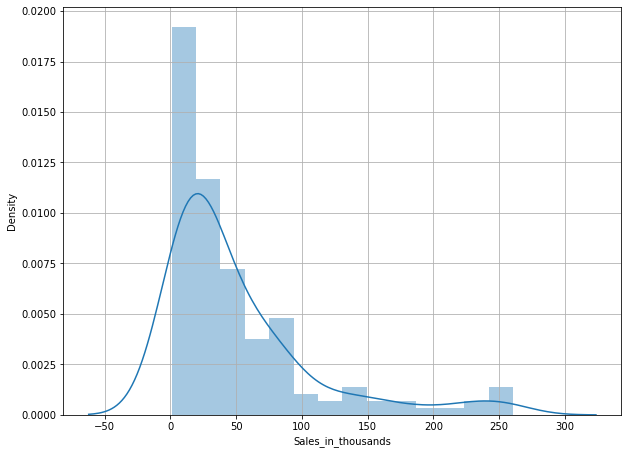

In [35]:
import seaborn as sns
sns.distplot(car_sales_new.Sales_in_thousands)

In [36]:
car_sales_new["ln_sales_in_thousands"]= np.log(car_sales_new["Sales_in_thousands"]+1)

In [37]:
car_sales_new["ln_sales_in_thousands"]= np.log(car_sales_new["Sales_in_thousands"])

C:\Users\smirn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ln_sales_in_thousands', ylabel='Density'>

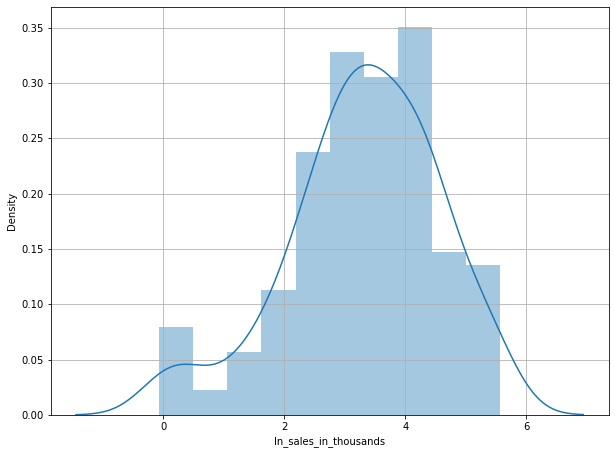

In [38]:
sns.distplot(car_sales_new.ln_sales_in_thousands)

C:\Users\smirn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ln_sales_in_thousands', ylabel='Density'>

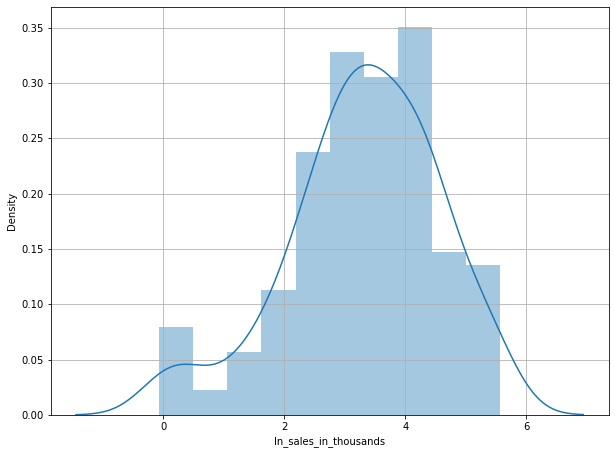

In [39]:
sns.distplot(car_sales_new.ln_sales_in_thousands)

In [40]:
#Dropping the variables
car_sales_new=car_sales_new.drop(['Sales_in_thousands'],axis=1)

In [41]:
# correlation matrix (ranges from 1 to -1)
car_sales_new.corr()

four_year_resale_value  Price_in_thousands  \
four_year_resale_value                 1.000000            0.793482   
Price_in_thousands                     0.793482            1.000000   
Engine_size                            0.433034            0.617601   
Horsepower                             0.650285            0.847967   
Wheelbase                             -0.040888            0.118272   
Width                                  0.165259            0.328579   
Length                                 0.040030            0.157225   
Curb_weight                            0.276207            0.526211   
Fuel_capacity                          0.268711            0.431413   
Fuel_efficiency                       -0.341003           -0.507150   
Power_perf_factor                      0.698053            0.906761   
Manufacturer_Audi                      0.156797            0.127263   
Manufacturer_BMW                       0.129421            0.058336   
Manufacturer_Buick                    -0.035874           -0.005682   
Manufacturer_Cadillac                  0.080756            0.168939   
Manufacturer_Chevrolet                -0.091862           -0.126279   
Manufacturer_Chrysler                 -0.049919           -0.060917   
Manufacturer_Dodge                    -0.014732           -0.060210   
Manufacturer_Ford                     -0.112716           -0.122565   
Manufacturer_Honda                    -0.028969           -0.091009   
Manufacturer_Hyundai                  -0.133877           -0.149483   
Manufacturer_Infiniti                  0.020610            0.012603   
Manufacturer_Jaguar                   -0.023915            0.089202   
Manufacturer_Jeep                     -0.025162           -0.062880   
Manufacturer_Lexus                     0.131204            0.240035   
Manufacturer_Lincoln                   0.023533            0.144387   
Manufacturer_Mercedes-B                0.257521            0.431829   
Manufacturer_Mercury                  -0.063768           -0.093284   
Manufacturer_Mitsubishi               -0.062736           -0.079100   
Manufacturer_Nissan                   -0.073373           -0.076104   
Manufacturer_Oldsmobile               -0.027436           -0.023572   
Manufacturer_Plymouth                 -0.101193           -0.053693   
Manufacturer_Pontiac                  -0.065511           -0.061809   
Manufacturer_Porsche                   0.517804            0.352504   
Manufacturer_Saab                     -0.033931            0.019062   
Manufacturer_Saturn                   -0.097963           -0.169161   
Manufacturer_Subaru                   -0.033931           -0.047888   
Manufacturer_Toyota                   -0.018848           -0.093559   
Manufacturer_Volkswagen               -0.056776           -0.136904   
Manufacturer_Volvo                    -0.059543            0.052376   
Vehicle_type_Passenger                 0.084599            0.044229   
ln_sales_in_thousands                 -0.446756           -0.577814   

                         Engine_size  Horsepower  Wheelbase     Width  \
four_year_resale_value      0.433034    0.650285  -0.040888  0.165259   
Price_in_thousands          0.617601    0.847967   0.118272  0.328579   
Engine_size                 1.000000    0.814995   0.518433  0.702596   
Horsepower                  0.814995    1.000000   0.325276  0.538193   
Wheelbase                   0.518433    0.325276   1.000000  0.681390   
Width                       0.702596    0.538193   0.681390  1.000000   
Length                      0.576364    0.420399   0.837535  0.700024   
Curb_weight                 0.793321    0.637164   0.656884  0.710129   
Fuel_capacity               0.698313    0.526638   0.659692  0.648637   
Fuel_efficiency            -0.757120   -0.610719  -0.498976 -0.584584   
Power_perf_factor           0.796531    0.989786   0.288849  0.506919   
Manufacturer_Audi          -0.016647    0.092354   0.012605  0.066329   
Manufacturer_BMW      

<AxesSubplot:>

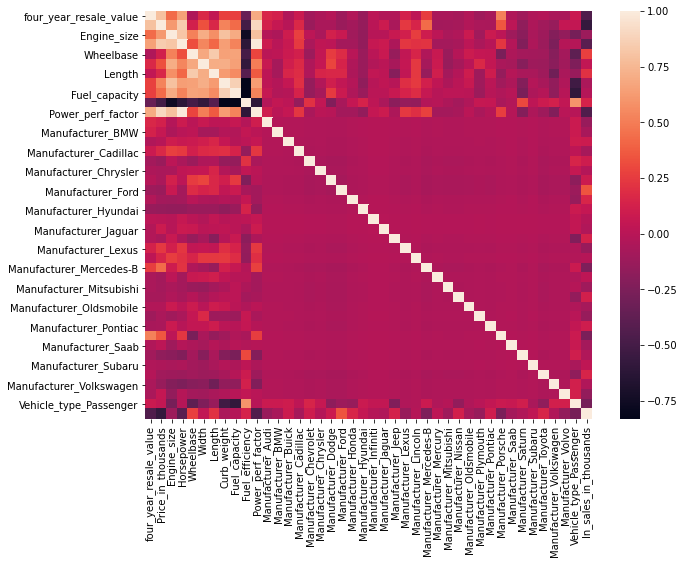

In [42]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(car_sales_new.corr())

#### What relationships do you notice?

In [43]:
#Splitting the data

feature_columns = car_sales_new.columns.difference( ['ln_sales_in_thousands'] )
feature_columns

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype

In [46]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( car_sales_new[feature_columns],
                                                  car_sales_new['ln_sales_in_thousands'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [47]:
print(len( train_X ))
print(len( test_X))

109
48


## Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response.

![Estimating coefficients](images/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

## Building a linear regression model

## Method-1

In [48]:
import statsmodels.api as sm

In [49]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [50]:
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.788
Model:                               OLS   Adj. R-squared:                  0.668
Method:                    Least Squares   F-statistic:                     6.576
Date:                   Sun, 14 May 2023   Prob (F-statistic):           7.19e-12
Time:                           10:37:50   Log-Likelihood:                -97.904
No. Observations:                    109   AIC:                             275.8
Df Residuals:                         69   BIC:                             383.5
Df Model:                             39                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [51]:
print('Parameters: ', lm.params)
print('R2: ', lm.rsquared)

Parameters:  const                     -7.007012e+00
Curb_weight                9.000382e-01
Engine_size                2.723284e-01
Fuel_capacity             -1.466827e-01
Fuel_efficiency            1.629864e-01
Horsepower                -1.562883e-02
Length                     5.249636e-03
Manufacturer_Audi         -3.463373e-01
Manufacturer_BMW           2.895216e-01
Manufacturer_Buick         6.725636e-01
Manufacturer_Cadillac      6.416176e-01
Manufacturer_Chevrolet     3.174361e-01
Manufacturer_Chrysler     -1.874342e-01
Manufacturer_Dodge         1.026538e+00
Manufacturer_Ford          1.519635e+00
Manufacturer_Honda         1.805775e+00
Manufacturer_Hyundai       8.727870e-01
Manufacturer_Infiniti     -1.055524e-15
Manufacturer_Jaguar        1.004688e+00
Manufacturer_Jeep          2.467084e+00
Manufacturer_Lexus         8.144265e-01
Manufacturer_Lincoln       7.830424e-01
Manufacturer_Mercedes-B    5.818337e-01
Manufacturer_Mercury       2.153391e-01
Manufacturer_Mitsubishi    

In [52]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.8034392894759207
MSE: 0.9861468815099045
RMSE: 0.9930492845321951


## Method-2

In [53]:
from sklearn.model_selection import train_test_split
train ,test = train_test_split(car_sales_new,test_size=0.3,random_state = 123 ) 

In [54]:
train.head(5)

four_year_resale_value  Price_in_thousands  Engine_size  Horsepower  \
45                   12.025              19.565          2.4       150.0   
129                   9.200              10.685          1.9       100.0   
79                    8.325              13.987          1.8       113.0   
153                  14.180              27.500          2.4       168.0   
35                    7.750              12.640          2.0       132.0   

     Wheelbase  Width  Length  Curb_weight  Fuel_capacity  Fuel_efficiency  \
45       113.3   76.8   186.3        3.533           20.0             24.0   
129      102.4   66.4   176.9        2.332           12.1             33.0   
79        98.4   66.5   173.6        2.250           13.2             30.0   
153      104.9   69.3   185.9        3.208           17.9             25.0   
35       105.0   74.4   174.4        2.567           12.5             29.0   

     ...  Manufacturer_Pontiac  Manufacturer_Porsche  Manufacturer_Saab  \
45   ...                     0                     0                  0   
129  ...                     0                     0                  0   
79   ...                     0                     0                  0   
153  ...                     0                     0                  0   
35   ...                     0                     0                  0   

     Manufacturer_Saturn  Manufacturer_Subaru  Manufacturer_Toyota  \
45                     0                    0                    0   
129                    1                    0                    0   
79                     0                    0                    0   
153                    0                    0                    0   
35                     0                    0                    0   

     Manufacturer_Volkswagen  Manufacturer_Volvo  Vehicle_type_Passenger  \
45                         0                   0                       0   
129                        0                   0                       1   
79                         0                   0                       1   
153                        0                   1                       1   
35                         0                   0                       1   

     ln_sales_in_thousands  
45                5.202627  
129               4.389747  
79                3.266980  
153               2.724252  
35                4.331181  

[5 rows x 42 columns]

In [55]:
train.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_s

In [56]:
train.columns= [phrase.strip().replace('-', '') for phrase in train.columns]
train.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_MercedesB',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_sa

In [57]:
all_columns = "+".join(train.columns.difference( ['ln_sales_in_thousands'] ))

print(all_columns)



Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac+Manufacturer_Chevrolet+Manufacturer_Chrysler+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Lincoln+Manufacturer_MercedesB+Manufacturer_Mercury+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Manufacturer_Pontiac+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Saturn+Manufacturer_Subaru+Manufacturer_Toyota+Manufacturer_Volkswagen+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+Width+four_year_resale_value


In [58]:
my_formula = "ln_sales_in_thousands~" + all_columns

print(my_formula)

ln_sales_in_thousands~Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac+Manufacturer_Chevrolet+Manufacturer_Chrysler+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Lincoln+Manufacturer_MercedesB+Manufacturer_Mercury+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Manufacturer_Pontiac+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Saturn+Manufacturer_Subaru+Manufacturer_Toyota+Manufacturer_Volkswagen+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+Width+four_year_resale_value


In [59]:
import statsmodels.formula.api as smf

lm=smf.ols(formula=my_formula, data=train).fit()
#lm=smf.ols('ln_sales_in_thousands~Price_in_thousands+four_year_resale_value+Engine_size+Curb_weight+Wheelbase+Width+Length+Horsepower+Fuel_capacity+Fuel_efficiency+Vehicle_type_Passenger', train).fit()

In [60]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.788
Model:                               OLS   Adj. R-squared:                  0.668
Method:                    Least Squares   F-statistic:                     6.576
Date:                   Sun, 14 May 2023   Prob (F-statistic):           7.19e-12
Time:                           10:38:16   Log-Likelihood:                -97.904
No. Observations:                    109   AIC:                             275.8
Df Residuals:                         69   BIC:                             383.5
Df Model:                             39                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -7.0070      3.340     -2.098      0.040     -13.671      -0.343
Curb_weight                 0.9000      0.428      2.101      0.039       0.045       1.755
Engine_size                 0.2723      0.260      1.046      0.299      -0.247       0.792
Fuel_capacity              -0.1467      0.064     -2.288      0.025      -0.275      -0.019
Fuel_efficiency             0.1630      0.059      2.773      0.007       0.046       0.280
Horsepower                 -0.0156      0.019     -0.807      0.422      -0.054       0.023
Length                      0.0052      0.021      0.252      0.802      -0.036       0.047
Manufacturer_Audi          -0.3463      1.000     -0.346      0.730      -2.342       1.649
Manufacturer_BMW            0.2895      0.954      0.303      0.763      -1.614       2.193
Manufacturer_Buick          0.6726      0.720      0.934      0.354      -0.765       2.110
Manufacturer_Cadillac       0.6416      0.679      0.945      0.348      -0.713       1.996
Manufacturer_Chevrolet      0.3174      0.694      0.457      0.649      -1.068       1.703
Manufacturer_Chrysler      -0.1874      0.742     -0.253      0.801      -1.667       1.292
Manufacturer_Dodge          1.0265      0.700      1.466      0.147      -0.370       2.423
Manufacturer_Ford           1.5196      0.666      2.280      0.026       0.190       2.849
Manufacturer_Honda          1.8058      0.810      2.228      0.029       0.189       3.422
Manufacturer_Hyundai        0.8728      0.815      1.071      0.288      -0.752       2.498
Manufacturer_Infiniti   -1.056e-15   2.03e-15     -0.521      0.604    -5.1e-15    2.99e-15
Manufacturer_Jaguar         1.0047      0.998      1.006      0.318      -0.987       2.996
Manufacturer_Jeep           2.4671      0.885      2.786      0.007       0.701       4.233
Manufacturer_Lexus          0.8144      0.685      1.188      0.239      -0.553       2.182
Manufacturer_Lincoln        0.7830      0.753      1.040      0.302      -0.719       2.285
Manufacturer_MercedesB      0.5818      0.650      0.895      0.374      -0.715       1.879
Manufacturer_Mercury        0.2153      0.786      0.274      0.785      -1.353       1.784
Manufacturer_Mitsubishi     0.3580      0.690      0.519      0.606      -1.019       1.735
Manufacturer_Nissan         1.4666      0.698      2.101      0.039       0.074       2.859
Manufacturer_Oldsmobile    -0.0616      0.682     -0.090      0.928      -1.422       1.299
Manufacturer_Plymouth      -1.0926      1.349     -0.810      0.421      -3.783       1.598
Manufacturer_Pontiac        0.5418      0.686      0.790      0.433      -0.827       1.911
Manufacturer_Porsche        1.6466      0.954      1.726      0.089      -0.257       3.550
Manufacturer_S

In [61]:
test.head(5)

four_year_resale_value  Price_in_thousands  Engine_size  Horsepower  \
24                   36.225              45.705          5.7      325.75   
23                   13.025              24.340          3.8      200.00   
138                  18.140              25.545          3.0      210.00   
87                   13.890              16.540          2.0      125.00   
134                  14.180              22.695          2.5      165.00   

     Wheelbase  Width  Length  Curb_weight  Fuel_capacity  Fuel_efficiency  \
24       104.5   73.6   179.7        3.210           19.1             22.0   
23       101.1   74.1   193.2        3.500           16.8             25.0   
138      107.1   71.7   191.9        3.417           18.5             26.0   
87       106.4   69.6   185.0        2.892           16.0             30.0   
134      103.5   67.5   185.8        3.415           16.9             25.0   

     ...  Manufacturer_Pontiac  Manufacturer_Porsche  Manufacturer_Saab  \
24   ...                     0                     0                  0   
23   ...                     0                     0                  0   
138  ...                     0                     0                  0   
87   ...                     0                     0                  0   
134  ...                     0                     0                  0   

     Manufacturer_Saturn  Manufacturer_Subaru  Manufacturer_Toyota  \
24                     0                    0                    0   
23                     0                    0                    0   
138                    0                    0                    1   
87                     0                    0                    0   
134                    0                    1                    0   

     Manufacturer_Volkswagen  Manufacturer_Volvo  Vehicle_type_Passenger  \
24                         0                   0                       1   
23                         0                   0                       1   
138                        0                   0                       1   
87                         0                   0                       1   
134                        0                   0                       1   

     ln_sales_in_thousands  
24                2.887423  
23                3.273440  
138               4.156521  
87                3.278238  
134               3.852422  

[5 rows x 42 columns]

In [62]:
test.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_s

In [63]:
test.columns= [phrase.strip().replace('-', '') for phrase in test.columns]
test.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_MercedesB',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_sa

In [64]:
pred = lm.predict(test)
pred.head(5)

24     2.298723
23     3.154606
138    3.937738
87     3.859349
134    3.307884
dtype: float64

In [65]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test.ln_sales_in_thousands, pred))
print('MSE:', metrics.mean_squared_error(test.ln_sales_in_thousands, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test.ln_sales_in_thousands, pred)))
print('R-Squre:', metrics.r2_score(test.ln_sales_in_thousands, pred))

MAE: 0.8034392894759209
MSE: 0.9861468815099048
RMSE: 0.9930492845321952
R-Squre: 0.2571018193344712


In [66]:
pred = lm.predict(train)
pred.head(5)

45     4.520903
129    3.526105
79     3.294513
153    2.622545
35     4.560062
dtype: float64

In [67]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(train.ln_sales_in_thousands, pred))
print('MSE:', metrics.mean_squared_error(train.ln_sales_in_thousands, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train.ln_sales_in_thousands, pred)))
print('R-Squre:', metrics.r2_score(train.ln_sales_in_thousands, pred))

MAE: 0.47120597164762373
MSE: 0.3529367949355784
RMSE: 0.5940848381633539
R-Squre: 0.7879992395148974
